In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal
from scipy.integrate import odeint

In [2]:
# The following function applies a unit step function to the transfer function of the quarter car model
# Variables are the coefficients defined in the transfer function, they depend on mass, spring constant, and damping coefficient
# The equations that define each variable are in the next cell
def quarc_transfunc(A,B,C,E,F,G):
    num = [A,B,C]
    den = [E,F,G,B,C]
    sys = signal.TransferFunction(num,den)
    t,y = signal.step(sys)
    return(t,y)

In [44]:
# This function takes in the parameters of unsprung mass, spring constant and damping coefficient and sprung mass
# It then asks for input on a range of damping values and plots the responses of the quarter car model for each damping value
def test_parameters(mu,ku,cu,ms):
    
    if type(mu) != int and type(mu) != float:
        return('unsprung mass is not a number!')
    if type(ku) != int and type(ku) != float:
        return('unsprung spring coefficent is not a number!')
    if type(cu) != int and type(cu) != float:
        return('unsprung damping coefficient is not a number!')
    if type(ms) != int and type(ms) != float:
        return('sprung mass is not a number!')
    
    # This spring constant (sprung mass) is meant to be messed with in the future
    ks = 55000
    
    print('Enter lower bound for sprung mass damping coefficient')
    x = float(input())
    print('Enter upper bound for sprung mass damping coefficient')
    y = float(input())
    print('Enter number of sprung mass damping coefficients to be tested')
    l = int(input())
    
    cs_array = np.linspace(x,y,l)
    settle_array = []
    amp_array = []
    collective = []
    for c in cs_array:
        st_time = 4*((2*ms)/c)
        settle_array.append(st_time)
        # Definitions of aforementioned variables
        A = c*cu
        B = c*ku + c*ks
        C = ks*ku
        E = ms*mu
        F = ms*cu + ms*c + mu*c
        G = ms*ku + ms*ks + mu*ku + c*cu
        result = quarc_transfunc(A,B,C,E,F,G)
        
        # Don't worry about this stuff, just checking that settling time formula works
        #for j in result[0]:
            #if abs(j-st_time) <= 0.01:
                #w = np.where(result[0] == j)
                #amp_array.append(result[1][w])

        vert = np.linspace(0.0,1.75,2)
        hoz=[]
        for z in vert:
            hoz.append(st_time)
        combin = [result[0],result[1],hoz,vert]
        collective.append(combin)


    
    # Graph stuff
    cs_values = []
    for i in range(len(cs_array)):
        k = 'cs = '
        n =str(cs_array[i])
        units = ' N.s/m'
        z = k + n + units
        cs_values.append(z)
    cs_table = []
    for p in range(len(cs_array)):
        n =str(cs_array[p])
        units = ' N.s/m'
        z = n + units
        cs_table.append(z)
    settle_table = []
    for g in range(len(settle_array)):
        n =str(settle_array[g])
        units = ' s'
        z = n + units
        settle_table.append(z)
        
    plt.gca().set_prop_cycle(None)
    plt.figure(1)
    for v in range(len(cs_values)):
        plt.plot(collective[v][0],collective[v][1])
    plt.gca().set_prop_cycle(None)
    for p in range(len(cs_values)):
        plt.plot(collective[p][2],collective[p][3],'--')   
    plt.xlabel('time')
    plt.ylabel('amplitude')
    plt.legend(cs_values)
    plt.title('Amplitude Response with Corresponding Settling Time')
    #print(amp_array)
    
    plt.figure(2)
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.box(on=None)
    table = plt.table(cellText=[cs_table,settle_table],rowLabels=['Damping Coefficients','Settling Time'],cellLoc='center',loc='top')
    table.auto_set_font_size(False)
    table.set_fontsize(14)
    table.scale(2, 1.5)
        


Enter lower bound for sprung mass damping coefficient
2000
Enter upper bound for sprung mass damping coefficient
4000
Enter number of sprung mass damping coefficients to be tested
3


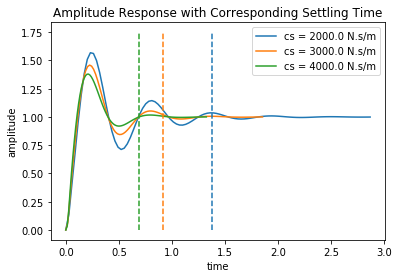

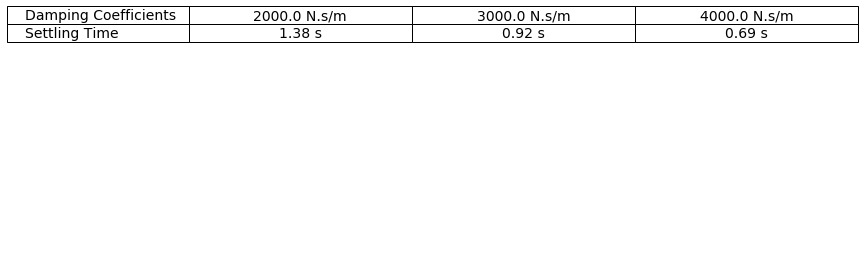

In [46]:
test_parameters(31,305000,0,345)